In [17]:
import matplotlib.pyplot as plt
import numpy as np

from dataproc.operations import source_separation as sep

import xrdc
from xrdc.datasets import d3d

patterns = m3d = d3d.get_data()
arr2d = patterns[:, :, 200]

In [7]:
# cutoff gives the standard deviation of the low-pass Gaussian kernel standard deviation,
#     as a fraction of the number of samples
# Threshold is a percentile threshold for classifiying points as 'background' or 'peak' in
#     the context of background interpolation
# smooth_q should be set to roughly the diffraction peak FWHM / 2.355
slow_q, fast_q, slow_T, fast_T = sep.separate_signal(patterns, cutoff = .25, threshold = 50, smooth_q = 1.7)

Raw (one wafer slice)

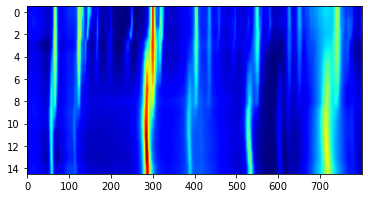

In [12]:
aspect = 800 / 30
plt.imshow(np.log(.001 + patterns[5, :, :]), cmap = 'jet', aspect = aspect)

Extracted high Q  (one wafer slice)

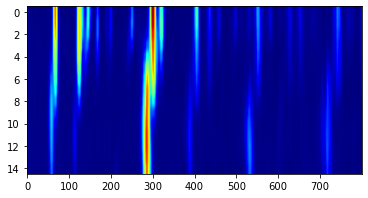

In [14]:
extracted_highQ = sep.reference_bgsub(patterns)
plt.imshow(np.log(.001 + extracted_highQ[5, :, :]), cmap = 'jet', aspect = aspect)

Interpolated background  (one wafer slice)

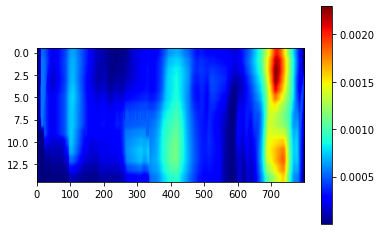

In [15]:
plt.imshow(sep.get_background(patterns, threshold = 50)[5, :, :], cmap = 'jet', aspect = aspect)
plt.colorbar()

Noise estimate map at a single q value:

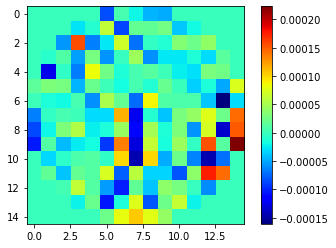

In [18]:
plt.imshow(fast_T[:, :, 100], cmap = 'jet')
plt.colorbar()